# Customer Feedback & Sentiment Dataset

# PREPROCESSING

In [ ]:
import pandas as pd
df=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/df2-customer_feedback_sentiment_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Neutral,1,Claim
1,1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim
2,2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Positive,2,Customer Support
3,3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim
4,4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Neutral,4,Claim


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Review_ID,0
Customer_ID,0
Review_Text,0
Sentiment_Label,0
Rating,0
Service_Type,0


In [ ]:
df.nunique()

,0
Unnamed: 0,1000
Review_ID,1000
Customer_ID,1000
Review_Text,1000
Sentiment_Label,3
Rating,5
Service_Type,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1000 non-null   int64 
 1   Review_ID        1000 non-null   object
 2   Customer_ID      1000 non-null   object
 3   Review_Text      1000 non-null   object
 4   Sentiment_Label  1000 non-null   object
 5   Rating           1000 non-null   int64 
 6   Service_Type     1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_ID        1000 non-null   object
 1   Customer_ID      1000 non-null   object
 2   Review_Text      1000 non-null   object
 3   Sentiment_Label  1000 non-null   object
 4   Rating           1000 non-null   int64 
 5   Service_Type     1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df.shape

(1000, 6)

# EDA

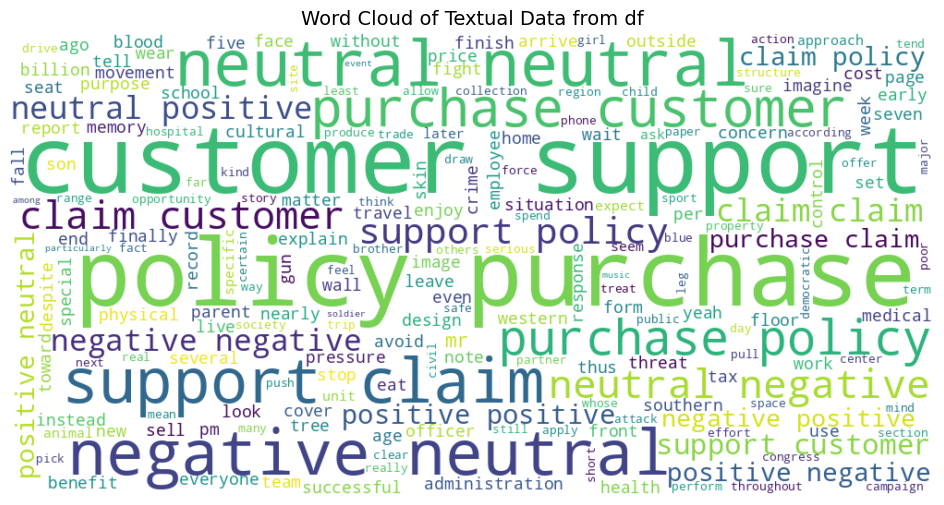

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load or create the DataFrame (df1 should already exist)
# If df1 is not created yet, you can generate it using the previous script

# Select only the text-based columns
text_columns = ['Review_Text', 'Sentiment_Label', 'Service_Type']

# Combine text data from all selected columns
# The change is in the following line: iterating over values in the series to create a list of strings
text_data = " ".join([str(value).lower() for col in text_columns for value in df[col].dropna()])

# Generate the Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.title("Word Cloud of Textual Data from df", fontsize=14)
plt.show()

# SENTIMENT LABELLING

In [ ]:
# Update Sentiment_Label based on Rating
df['Sentiment_Label'] = df['Rating'].apply(lambda x: 'Negative' if x in [1, 2]
                                            else 'Neutral' if x == 3
                                            else 'Positive' if x in [4, 5]
                                            else None)

In [ ]:
df.head()

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim
1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim
2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support
3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim
4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim


# 2) Text Cleaning & Tokenization

PREPROCESSING FOR REVIEW TEXT

In [ ]:
df['Review_Text'].head()

,Review_Text
0,Beautiful instead ahead despite measure ago cu...
1,Left establish understand read. Range successf...
2,Other life edge network wall quite. Race Mr en...
3,Within mouth call process. Close month parent ...
4,Anything yourself structure why. Coach magazin...


In [ ]:
# # Step 1: Uninstall NLTK and delete its data entirely
# !pip uninstall -y nltk
# !rm -rf /root/nltk_data
# !rm -rf /usr/local/nltk_data


In [ ]:
# # Step 2: Reinstall a stable version of NLTK
# !pip install nltk==3.9.1
# #Pin to a stable version

# REMOVE SPECIAL CHARACTERS

In [ ]:
import re
df["cleaned_Review_Text"] = df["Review_Text"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).strip())

# Display first few rows
df.head()


,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,cleaned_Review_Text
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim,Beautiful instead ahead despite measure ago cu...
1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim,Left establish understand read Range successfu...
2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support,Other life edge network wall quite Race Mr env...
3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim,Within mouth call process Close month parent w...
4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim,Anything yourself structure why Coach magazine...


# STOP WORDS REMOVE

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to remove stopwords, keeping punctuation and special characters
def remove_stopwords(text):
    words = text.split()  # Just split on spaces, no lowercasing
    filtered_words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_words)

# Apply stopword removal
df['Stop_words_removed'] = df['cleaned_Review_Text'].apply(remove_stopwords)


In [ ]:
df.head()

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,cleaned_Review_Text,Stop_words_removed
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...
1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim,Left establish understand read Range successfu...,Left establish understand read Range successfu...
2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support,Other life edge network wall quite Race Mr env...,life edge network wall quite Race Mr environme...
3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim,Within mouth call process Close month parent w...,mouth process Close month parent sense ready H...
4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim,Anything yourself structure why Coach magazine...,structure Coach magazine degree husband Able h...


# Puncuation Removing

In [ ]:
import string

# Function to remove punctuation
def remove_punctuation(text):
    if isinstance(text, list):  # If text is already tokenized
        words = text
    else:
        words = str(text).split()  # Convert to string and split into words

    cleaned_words = [word for word in words if word not in string.punctuation]  # Remove punctuation
    return ' '.join(cleaned_words)  # Join back into a sentence

# Apply punctuation removal
df['Punctuation_removed'] = df['Stop_words_removed'].apply(remove_punctuation)

# Display results
df.head()


,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,cleaned_Review_Text,Stop_words_removed,Punctuation_removed
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...
1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim,Left establish understand read Range successfu...,Left establish understand read Range successfu...,Left establish understand read Range successfu...
2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support,Other life edge network wall quite Race Mr env...,life edge network wall quite Race Mr environme...,life edge network wall quite Race Mr environme...
3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim,Within mouth call process Close month parent w...,mouth process Close month parent sense ready H...,mouth process Close month parent sense ready H...
4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim,Anything yourself structure why Coach magazine...,structure Coach magazine degree husband Able h...,structure Coach magazine degree husband Able h...


# TOKENIZATION

In [ ]:
# Tokenization function (split by spaces)
def tokenize(text):
    return text.split()

# Apply tokenization
df['Tokenized_Review'] = df['Punctuation_removed'].apply(tokenize)
df.head()

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,cleaned_Review_Text,Stop_words_removed,Punctuation_removed,Tokenized_Review
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,"[Beautiful, instead, ahead, despite, measure, ..."
1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim,Left establish understand read Range successfu...,Left establish understand read Range successfu...,Left establish understand read Range successfu...,"[Left, establish, understand, read, Range, suc..."
2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support,Other life edge network wall quite Race Mr env...,life edge network wall quite Race Mr environme...,life edge network wall quite Race Mr environme...,"[life, edge, network, wall, quite, Race, Mr, e..."
3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim,Within mouth call process Close month parent w...,mouth process Close month parent sense ready H...,mouth process Close month parent sense ready H...,"[mouth, process, Close, month, parent, sense, ..."
4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim,Anything yourself structure why Coach magazine...,structure Coach magazine degree husband Able h...,structure Coach magazine degree husband Able h...,"[structure, Coach, magazine, degree, husband, ..."


In [ ]:
import nltk
# Download the WordNet corpus for lemmatization
nltk.download('wordnet')
# Download the WordNet Open Multilingual WordNet (OMW) for lemmatization
nltk.download('omw-1.4')
# Download the part-of-speech tagger
nltk.download('averaged_perceptron_tagger')
# Download the part-of-speech tagger
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

# LEMMATIZATION [OBVIOUSLY IS DONE WITH PARTS OF SPEECH]

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# Download necessary NLTK data (if not already downloaded)
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map POS tags for better lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):  # Adjective
        return wordnet.ADJ
    elif tag.startswith('V'):  # Verb
        return wordnet.VERB
    elif tag.startswith('N'):  # Noun
        return wordnet.NOUN
    elif tag.startswith('R'):  # Adverb
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Function to lemmatize tokenized text
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)  # Get POS tags
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]  # Lemmatize
    return lemmatized_tokens  # Returns list of lemmatized words

# Apply lemmatization to tokenized column
df['Lemmatized_Review'] = df['Tokenized_Review'].apply(lemmatize_tokens)

# Display first few rows
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,cleaned_Review_Text,Stop_words_removed,Punctuation_removed,Tokenized_Review,Lemmatized_Review
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,"[Beautiful, instead, ahead, despite, measure, ...","[Beautiful, instead, ahead, despite, measure, ..."
1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim,Left establish understand read Range successfu...,Left establish understand read Range successfu...,Left establish understand read Range successfu...,"[Left, establish, understand, read, Range, suc...","[Left, establish, understand, read, Range, suc..."
2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support,Other life edge network wall quite Race Mr env...,life edge network wall quite Race Mr environme...,life edge network wall quite Race Mr environme...,"[life, edge, network, wall, quite, Race, Mr, e...","[life, edge, network, wall, quite, Race, Mr, e..."
3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim,Within mouth call process Close month parent w...,mouth process Close month parent sense ready H...,mouth process Close month parent sense ready H...,"[mouth, process, Close, month, parent, sense, ...","[mouth, process, Close, month, parent, sense, ..."
4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim,Anything yourself structure why Coach magazine...,structure Coach magazine degree husband Able h...,structure Coach magazine degree husband Able h...,"[structure, Coach, magazine, degree, husband, ...","[structure, Coach, magazine, degree, husband, ..."


# **Review_Text Column was done by**

1) SPECIAL CHARACTERS REMOVAL,

2) StopWords Removal,

3) Punctuation removal,

4) Tokenization

all process done

final process was Lemmatization **so Kept only Lemmatized_Review Column** Other Columns will Removed



In [ ]:
df.to_csv(r'..\Data\2_NLP_Tasked_file_Text_review.csv')

In [ ]:
import pandas as pd
file = pd.read_csv(r'..\Data\2_NLP_Tasked_file_Text_review.csv')

In [ ]:
file.head()

,Unnamed: 0,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,cleaned_Review_Text,Stop_words_removed,Punctuation_removed,Tokenized_Review,Lemmatized_Review
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,"['Beautiful', 'instead', 'ahead', 'despite', '...","['Beautiful', 'instead', 'ahead', 'despite', '..."
1,1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim,Left establish understand read Range successfu...,Left establish understand read Range successfu...,Left establish understand read Range successfu...,"['Left', 'establish', 'understand', 'read', 'R...","['Left', 'establish', 'understand', 'read', 'R..."
2,2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support,Other life edge network wall quite Race Mr env...,life edge network wall quite Race Mr environme...,life edge network wall quite Race Mr environme...,"['life', 'edge', 'network', 'wall', 'quite', '...","['life', 'edge', 'network', 'wall', 'quite', '..."
3,3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim,Within mouth call process Close month parent w...,mouth process Close month parent sense ready H...,mouth process Close month parent sense ready H...,"['mouth', 'process', 'Close', 'month', 'parent...","['mouth', 'process', 'Close', 'month', 'parent..."
4,4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim,Anything yourself structure why Coach magazine...,structure Coach magazine degree husband Able h...,structure Coach magazine degree husband Able h...,"['structure', 'Coach', 'magazine', 'degree', '...","['structure', 'Coach', 'magazine', 'degree', '..."


In [ ]:
file.drop(columns=['Unnamed: 0','Review_ID','Customer_ID','Review_Text', 'cleaned_Review_Text', 'cleaned_Review_Text', 'Tokenized_Review','Punctuation_removed','Stop_words_removed'], axis=1, inplace=True)
file.head()

,Sentiment_Label,Rating,Service_Type,Lemmatized_Review
0,Negative,1,Claim,"['Beautiful', 'instead', 'ahead', 'despite', '..."
1,Neutral,3,Claim,"['Left', 'establish', 'understand', 'read', 'R..."
2,Negative,2,Customer Support,"['life', 'edge', 'network', 'wall', 'quite', '..."
3,Positive,5,Claim,"['mouth', 'process', 'Close', 'month', 'parent..."
4,Positive,4,Claim,"['structure', 'Coach', 'magazine', 'degree', '..."


# VECTORIZATION

# 1. Traditional Text Representations
# (i)Bag of Words (BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(file['Lemmatized_Review'])

In [ ]:
pd.DataFrame(bow_features)

,0
0,"(0, 59)\t1\n (0, 328)\t1\n (0, 22)\t1\n (..."
1,"(0, 360)\t1\n (0, 215)\t1\n (0, 727)\t1\n ..."
2,"(0, 155)\t1\n (0, 365)\t1\n (0, 201)\t1\n ..."
3,"(0, 437)\t1\n (0, 423)\t1\n (0, 516)\t1\n ..."
4,"(0, 382)\t1\n (0, 668)\t1\n (0, 124)\t1\n ..."
...,...
995,"(0, 257)\t1\n (0, 97)\t1\n (0, 122)\t1\n ..."
996,"(0, 498)\t1\n (0, 609)\t1\n (0, 515)\t1\n ..."
997,"(0, 625)\t1\n (0, 136)\t1\n (0, 730)\t1\n ..."
998,"(0, 326)\t1\n (0, 535)\t1\n (0, 71)\t1\n ..."


# (ii)TF-IDF (Term Frequency - Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(file['Lemmatized_Review'])

In [ ]:
tfidf_features

<1000x773 sparse matrix of type '<class 'numpy.float64'>'
	with 17063 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tfidf_features)

,0
0,"(0, 59)\t0.22665528054150852\n (0, 328)\t0...."
1,"(0, 360)\t0.3813390442502869\n (0, 215)\t0...."
2,"(0, 155)\t0.2099228013749538\n (0, 365)\t0...."
3,"(0, 437)\t0.22646664002801814\n (0, 423)\t0..."
4,"(0, 382)\t0.30923100186622643\n (0, 668)\t0..."
...,...
995,"(0, 257)\t0.20169161371019667\n (0, 97)\t0...."
996,"(0, 498)\t0.2481028672066097\n (0, 609)\t0...."
997,"(0, 625)\t0.25838447221230004\n (0, 136)\t0..."
998,"(0, 326)\t0.19850163296273846\n (0, 535)\t0..."


# 2. Word Embeddings
# (iii) Word2Vec

In [ ]:
!pip install pandas==2.2.2
!pip install requests==2.32.4
!pip install thinc==8.3.4
!pip install spacy==3.8.7
!pip install opencv-contrib-python==4.9.0.80  # This is a random example, you may need to find a suitable version
!pip install blis==0.7.11
!pip install tsfresh==0.20.0
!pip install gensim

  Using cached blis-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.4 kB)
Using cached blis-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Using cached blis-0.7.11-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.4 kB)
Using cached blis-0.7.11-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.2 MB)
  Attempting uninstall: blis
    Found existing installation: blis 1.2.1
    Uninstalling blis-1.2.1:
      Successfully uninstalled blis-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.4 requires blis<1.3.0,>=1.2.0, but you have blis 0.7.11 which is incompatible.


In [ ]:
# # Upgrade all packages to their latest compatible versions
# !pip install --upgrade --ignore-installed opencv-python opencv-contrib-python opencv-python-headless thinc tsfresh

In [ ]:
# !pip install numpy==1.26.0  # TensorFlow's lowest compatible version
# !pip install pandas==2.2.2  # Google-Colab's required version
# !pip install scipy==1.13.0  # gensim's highest compatible version

In [ ]:
# !pip install --upgrade --force-reinstall numpy gensim

In [ ]:
from gensim.models import Word2Vec
tokenized_reviews = file['Lemmatized_Review'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

In [ ]:
file['w2v']=word_vectors
file['w2v']

,w2v
0,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
1,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
2,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
3,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
4,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
...,...
995,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
996,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
997,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."
998,"[[-0.011550021, 0.012471371, 0.009788101, 0.01..."


# 3. Deep Learning-Based Representations
# (iv) BERT (Using Hugging Face Transformers)

In [ ]:
!pip install transformers
!pip install torch

In [ ]:
file=pd.read_csv(r'..\Data\2_NLP_Tasked_file_Text_review.csv')

In [ ]:
file.head()

,Unnamed: 0,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type,cleaned_Review_Text,Stop_words_removed,Punctuation_removed,Tokenized_Review,Lemmatized_Review
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Negative,1,Claim,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,Beautiful instead ahead despite measure ago cu...,"['Beautiful', 'instead', 'ahead', 'despite', '...","['Beautiful', 'instead', 'ahead', 'despite', '..."
1,1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim,Left establish understand read Range successfu...,Left establish understand read Range successfu...,Left establish understand read Range successfu...,"['Left', 'establish', 'understand', 'read', 'R...","['Left', 'establish', 'understand', 'read', 'R..."
2,2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Negative,2,Customer Support,Other life edge network wall quite Race Mr env...,life edge network wall quite Race Mr environme...,life edge network wall quite Race Mr environme...,"['life', 'edge', 'network', 'wall', 'quite', '...","['life', 'edge', 'network', 'wall', 'quite', '..."
3,3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim,Within mouth call process Close month parent w...,mouth process Close month parent sense ready H...,mouth process Close month parent sense ready H...,"['mouth', 'process', 'Close', 'month', 'parent...","['mouth', 'process', 'Close', 'month', 'parent..."
4,4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Positive,4,Claim,Anything yourself structure why Coach magazine...,structure Coach magazine degree husband Able h...,structure Coach magazine degree husband Able h...,"['structure', 'Coach', 'magazine', 'degree', '...","['structure', 'Coach', 'magazine', 'degree', '..."


In [ ]:
del file['Unnamed: 0']

# STANDARD BERT-EMBEDDING

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)

    # Average pooling & Convert tensor to numpy
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze(0)  # Shape: (hidden_dim,)
    return embedding.cpu().numpy()  # Convert to NumPy array

# Apply function to dataframe column
file['BERT_Embeddings'] = file['Lemmatized_Review'].apply(get_bert_embeddings)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
import joblib
joblib.dump(tokenizer, "bert_tokenizer.pkl")
joblib.dump(model, "bert_model.pkl")

print("BERT Model, Tokenizer, and Embeddings Saved Successfully!")

BERT Model, Tokenizer, and Embeddings Saved Successfully!


# DefininG with loaded models

In [ ]:
import joblib
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

# Load tokenizer & model from saved files
tokenizer = joblib.load(r'..\Models\tokenizer_bert_textreview.pkl')
model = joblib.load(r'..\Models\torch_bert_textreview.pkl')

# Function to get BERT embedding for new input
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze(0)
    return embedding.cpu().numpy()


FileNotFoundError: [Errno 2] No such file or directory: '..\\Models\\tokenizer_bert_textreview.pkl'

#  Singular Value Decomposition (SVD) on the BERT Embeddings  TO REDUCE IT 1D

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Load your dataset
file = pd.read_csv("/content/2_NLP_Tasked_file_Text_review.csv")  # Replace with your actual file

# Ensure 'BERT_Embeddings' is stored as a list of numbers
df["BERT_svd_1d"] = df["BERT_Embeddings"].apply(eval)  # If stored as string, convert to list

# Convert to NumPy array
X = np.array(df["BERT_Embeddings"].tolist())  # Shape: (n_samples, embedding_dim)


1D

In [ ]:
svd = TruncatedSVD(n_components=1, random_state=42)
X_svd = svd.fit_transform(X)  # Shape: (n_samples, 1)

# Add the 1D representation back to the DataFrame
file["SVD_1D_BERT"] = X_svd.flatten()


50D

In [ ]:
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X)  # Shape: (n_samples, 50)

# Add the 50D representation back to the DataFrame
for i in range(50):
    df[f"BERT_SVD_{i+1}"] = X_svd[:, i]


In [ ]:
import joblib
joblib.dump(tokenizer,r'..\Models\tokenizer_bert_textreview.pkl')
joblib.dump(model,r'..\Models\torch_bert_textreview.pkl')

['..\\Models\\torch_bert_textreview.pkl']

In [ ]:
file['BERT_Embeddings']

,BERT_Embeddings
0,"[0.0017786248, 0.5569652, 0.59005284, -0.25439..."
1,"[0.030119395, 0.6805604, 0.5602574, -0.4323318..."
2,"[0.20004505, 0.6009299, 0.8543724, -0.27767822..."
3,"[0.112569675, 0.6449481, 0.8521676, -0.2590948..."
4,"[0.021654394, 0.5600072, 0.8074564, -0.4195642..."
...,...
995,"[0.22054397, 0.71313787, 0.81152576, -0.277432..."
996,"[-0.0025764767, 0.6519846, 0.6400344, -0.29790..."
997,"[0.079967625, 0.52082413, 0.62380844, -0.36047..."
998,"[0.13353726, 0.6021995, 0.76500833, -0.3157180..."


In [ ]:
import numpy as np

# Convert string embeddings back to NumPy arrays
feature = np.array([
    np.fromstring(embedding.strip("[]"), sep=" ")  # Ensure correct separator
    for embedding in file['BERT_Embeddings'].astype(str)
])


In [ ]:
feature


array([[ 0.00177862,  0.55696517,  0.59005284, ..., -0.04556434,
        -0.04580608, -0.43884283],
       [ 0.03011939,  0.68056041,  0.56025737, ..., -0.14667346,
        -0.05588203, -0.35741386],
       [ 0.20004505,  0.60092992,  0.85437238, ..., -0.07024489,
         0.02341648, -0.43600374],
       ...,
       [ 0.07996763,  0.52082413,  0.62380844, ..., -0.12738343,
        -0.0729273 , -0.26479015],
       [ 0.13353726,  0.6021995 ,  0.76500833, ..., -0.00216878,
        -0.01539665, -0.44672099],
       [ 0.10500465,  0.59696472,  0.43571302, ..., -0.24050668,
         0.08277198, -0.25582787]])

COVERT TO DATAFRAME

In [ ]:
pd.DataFrame(feature)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.001779,0.556965,0.590053,-0.254394,0.235334,0.126279,0.446329,0.670363,-0.221200,0.006462,...,-0.296088,0.051294,0.390944,-0.638878,-0.091663,-0.335522,-0.346817,-0.045564,-0.045806,-0.438843
1,0.030119,0.680560,0.560257,-0.432332,0.179370,0.065480,0.569206,0.760702,-0.025168,0.171528,...,-0.056521,-0.082721,0.239709,-0.454733,-0.197245,-0.175209,-0.153633,-0.146673,-0.055882,-0.357414
2,0.200045,0.600930,0.854372,-0.277678,0.317093,0.245597,0.419460,0.781653,-0.214275,0.094270,...,-0.243493,0.107332,0.488397,-0.705969,-0.085501,-0.347500,-0.388246,-0.070245,0.023416,-0.436004
3,0.112570,0.644948,0.852168,-0.259095,0.297741,0.125058,0.471254,0.779362,-0.090728,0.073562,...,-0.137291,-0.110157,0.456267,-0.737136,-0.188267,-0.309431,-0.317373,-0.069029,0.024187,-0.433938
4,0.021654,0.560007,0.807456,-0.419564,0.380034,0.229625,0.351713,0.834544,-0.152358,0.168402,...,-0.156653,-0.051949,0.481003,-0.667516,-0.234740,-0.321544,-0.421393,-0.235045,0.075861,-0.362327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.220544,0.713138,0.811526,-0.277433,0.258107,0.051994,0.444217,0.627953,-0.060832,0.102103,...,-0.309962,0.049490,0.448752,-0.751593,-0.079792,-0.137262,-0.212781,0.016586,-0.067070,-0.389683
996,-0.002576,0.651985,0.640034,-0.297906,0.335211,0.266454,0.251499,0.718143,-0.170439,0.139752,...,-0.229018,0.034275,0.404889,-0.697889,-0.096675,-0.370693,-0.333103,-0.000014,0.107324,-0.336922
997,0.079968,0.520824,0.623808,-0.360478,0.226528,0.177736,0.399983,0.741388,-0.012384,0.064310,...,-0.105983,-0.047482,0.404759,-0.683749,-0.243323,-0.210105,-0.196912,-0.127383,-0.072927,-0.264790
998,0.133537,0.602199,0.765008,-0.315718,0.271030,0.149823,0.431746,0.782695,-0.135498,0.115041,...,-0.410776,-0.019236,0.404885,-0.759877,-0.101937,-0.243852,-0.381187,-0.002169,-0.015397,-0.446721


In [ ]:
print(feature.shape)  # Should be (num_samples, embedding_dim)


(1000, 768)


TAKINGASFUTURE

In [ ]:
feature_of_text_review_ins=pd.DataFrame(feature)
feature_of_text_review_ins.to_csv(r'..\Data\feature_of_text_review_ins.csv')

#APPLY PRINCIPAL COMPONENT ANALYSE FOR REDUCE DIMENSIONS OF STAND BERT-EMBEDDIN

In [ ]:
from sklearn.decomposition import PCA

# Convert embeddings to a NumPy array
embeddings = np.vstack(file['BERT_Embeddings'].values)

# Apply PCA to reduce to 50 dimensions
pca = PCA(n_components=50)
bert_50d_embeddings = pca.fit_transform(embeddings)

# Save back to DataFrame
file['BERT_50D'] = list(bert_50d_embeddings)

file['BERT_50D']

,BERT_50D
0,"[0.4262206, 0.32197914, -0.5915442, -0.1999274..."
1,"[-1.6858428, 0.38970006, -0.9777276, 0.3726916..."
2,"[1.0347015, -0.71316797, 0.058568686, -0.77284..."
3,"[0.7167977, 0.046176717, -0.30834234, -0.39072..."
4,"[-0.67388767, -0.8019507, 1.1369407, -0.422743..."
...,...
995,"[0.7333746, 0.4313675, -0.39550886, 0.3648436,..."
996,"[-0.11857283, -0.35771373, 0.34480733, 0.05082..."
997,"[-0.6625967, 0.3276966, 0.037403848, 0.1565507..."
998,"[0.86685926, 0.0049459278, 0.12639065, -0.0404..."


#MEAN POOLIN-MAKING 1D BY AVERAGE OF DIMENSIONS FROM BERT-EMBEDDING

In [ ]:
def get_bert_embedding(text):
    # Tokenize input text and convert to tensor
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Disable gradient calculation to save memory
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the last hidden state (batch_size, sequence_length, hidden_dim)
    last_hidden_state = outputs.last_hidden_state

    # Option 1: Take the [CLS] token (first token) representation as a 1D embedding
    cls_embedding = last_hidden_state[:, 0, :].squeeze().numpy()

    # Option 2: Take the mean of all token embeddings as a 1D embedding
    mean_embedding = last_hidden_state.mean(dim=1).squeeze().numpy()

    return mean_embedding  # Change to cls_embedding if needed

file['1DBERT_Embedding'] = file['Lemmatized_Review'].apply(get_bert_embedding)
file['1DBERT_Embedding']

,1DBERT_Embedding
0,"[0.0017786248, 0.5569652, 0.59005284, -0.25439..."
1,"[0.030119395, 0.6805604, 0.5602574, -0.4323318..."
2,"[0.20004505, 0.6009299, 0.8543724, -0.27767822..."
3,"[0.112569675, 0.6449481, 0.8521676, -0.2590948..."
4,"[0.021654394, 0.5600072, 0.8074564, -0.4195642..."
...,...
995,"[0.22054397, 0.71313787, 0.81152576, -0.277432..."
996,"[-0.0025764767, 0.6519846, 0.6400344, -0.29790..."
997,"[0.079967625, 0.52082413, 0.62380844, -0.36047..."
998,"[0.13353726, 0.6021995, 0.76500833, -0.3157180..."


# MODEL SELECTION AND PREDICTION

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv(r'..\Data\feature_of_text_review_ins.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,0,0.001779,0.556965,0.590053,-0.254394,0.235334,0.126279,0.446329,0.670363,-0.221200,...,-0.296088,0.051294,0.390944,-0.638878,-0.091663,-0.335522,-0.346817,-0.045564,-0.045806,-0.438843
1,1,0.030119,0.680560,0.560257,-0.432332,0.179370,0.065480,0.569206,0.760702,-0.025168,...,-0.056521,-0.082721,0.239709,-0.454733,-0.197245,-0.175209,-0.153633,-0.146673,-0.055882,-0.357414
2,2,0.200045,0.600930,0.854372,-0.277678,0.317093,0.245597,0.419460,0.781653,-0.214275,...,-0.243493,0.107332,0.488397,-0.705969,-0.085501,-0.347500,-0.388246,-0.070245,0.023416,-0.436004
3,3,0.112570,0.644948,0.852168,-0.259095,0.297741,0.125058,0.471254,0.779362,-0.090728,...,-0.137291,-0.110157,0.456267,-0.737136,-0.188267,-0.309431,-0.317373,-0.069029,0.024187,-0.433938
4,4,0.021654,0.560007,0.807456,-0.419564,0.380034,0.229625,0.351713,0.834544,-0.152358,...,-0.156653,-0.051949,0.481003,-0.667516,-0.234740,-0.321544,-0.421393,-0.235045,0.075861,-0.362327


In [ ]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [ ]:
feature=pd.read_csv(r'..\Data\feature_of_text_review_ins.csv')
target=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/target_for_review_text_ins.csv')

In [ ]:
feature.shape

(1000, 769)

In [ ]:
del feature['Unnamed: 0']
del target['Unnamed: 0']

In [ ]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.2,stratify=target)
dtc.fit(feature_train,target_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
rfc.fit(feature_train,target_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#Perfect RandomForestclassifer Model load

In [ ]:
joblib.dump(rfc,r'..\Models\Prefect_RandomForestclassifer_Model_for_ReviewText.pkl')

['..\\Models\\Prefect_RandomForestclassifer_Model_for_ReviewText.pkl']

In [ ]:
import joblib
rfc_for_review_text=joblib.load(r'..\Models\Prefect_RandomForestclassifer_Model_for_ReviewText.pkl')
rfc_for_review_text


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Get user input
user_text = 'Excellent helpful excellent excellent best best amazing great amazing excellent fast helpful amazing helpful best great amazing helpful fast excellent amazing fast'
# Convert user input into BERT embedding
user_embedding = get_bert_embeddings(user_text).reshape(1, -1)  # Reshape for prediction
print(user_embedding)
new_data = np.array([[user_embedding]]),
# Predict using trained model
prediction = rfc_for_review_text.predict(user_embedding)  # Change to `regressor.predict()` if regression

# Output the result
print("Predicted Output:", prediction)


[[-4.09432262e-01  1.77527200e-02  3.74900728e-01 -8.66758227e-02
  -1.29358709e-01 -4.22435999e-01  1.88634574e-01  5.53566217e-01
   1.61864460e-01 -3.80290866e-01 -2.02448368e-02  2.46357724e-01
   4.98065352e-02  2.81616896e-01 -4.78378147e-01  5.08471549e-01
   3.02521884e-01  2.88765877e-01 -5.17461061e-01  5.99334896e-01
   8.24959502e-02  2.50194352e-02 -3.23767990e-01 -1.64475158e-01
   5.96330225e-01  2.70530552e-01 -4.46140915e-02 -1.41104281e-01
  -3.75774860e-01 -3.52205366e-01  7.45386362e-01 -3.23843807e-01
   3.25188190e-01  9.56127867e-02 -4.95375782e-01 -2.57874727e-01
   7.17289001e-02 -6.59011975e-02 -1.82581380e-01  1.28004923e-02
  -3.44095044e-02 -5.18412650e-01  1.58657208e-02  6.96921498e-02
   1.74933314e-01 -3.90630722e-01 -3.90330516e-02  1.81150123e-01
   5.68198264e-01 -5.03969729e-01 -7.16856897e-01  5.38709104e-01
  -2.14589044e-01  3.90716344e-01 -2.32432440e-01  3.69062573e-01
   1.21113859e-01 -4.65885133e-01 -7.37364367e-02 -5.41404188e-01
  -5.00175

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Get user input
user_text = 'Decent neutral decent average average fine average fine neutral decent average neutral fine okay okay okay fine not bad decent okay decent neutral fine neutral neutral okay not bad not bad fine average'

# Convert user input into BERT embedding
user_embedding = get_bert_embeddings(user_text).reshape(1, -1)  # Reshape for prediction
print(user_embedding)
new_data = np.array([[user_embedding]]),
# Predict using trained model
prediction = rfc_for_review_text.predict(user_embedding)  # Change to `regressor.predict()` if regression

# Output the result
print("Predicted Output:", prediction)

[[ 2.47578025e-01  1.08838789e-01  3.56422216e-01 -1.52459145e-01
  -3.85854870e-01 -4.59106058e-01  1.56796992e-01  5.33467591e-01
   5.76256156e-01 -1.09500431e-01 -1.05906069e-01 -3.11896764e-02
  -2.81458795e-01  1.12209588e-01  1.20699666e-01  5.09847939e-01
   5.04645407e-02  1.13611601e-01  8.43220875e-02  4.82447803e-01
  -6.90733641e-02 -1.03412285e-01 -3.41999270e-02 -8.74749944e-02
   4.32389319e-01 -1.13629028e-01  6.57627046e-01  1.42238393e-01
  -5.77121377e-02 -2.53397375e-01  4.08669859e-01  1.51407838e-01
  -1.68275446e-01 -7.46678591e-01 -2.27235645e-01 -3.39665800e-01
   5.94958723e-01  3.52050364e-01 -3.07974041e-01  2.98284978e-01
   1.73144311e-01 -7.36098468e-01  1.00876860e-01 -2.74226367e-01
  -4.28082705e-01 -4.35340762e-01  2.03798234e-01  3.08799744e-01
   6.71781123e-01 -3.16499054e-01 -5.20159066e-01  3.72454315e-01
  -8.88085485e-01  2.91026291e-02 -1.80461630e-01  6.00017905e-01
   2.16591820e-01 -3.33846927e-01 -3.33514631e-01 -3.42329568e-03
  -4.70409

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Get user input
user_text = 'Slow slow terrible bad slow bad worst bad terrible unhelpful worst slow terrible bad unhelpful frustrating worst worst'

# Convert user input into BERT embedding
user_embedding = get_bert_embeddings(user_text).reshape(1, -1)  # Reshape for prediction
print(user_embedding)
new_data = np.array([[user_embedding]]),
# Predict using trained model
prediction = rfc_for_review_text.predict(user_embedding)  # Change to `regressor.predict()` if regression

# Output the result
print("Predicted Output:", prediction)

[[-4.29505944e-01  1.19686954e-01  1.20890029e-01 -1.50819272e-01
  -3.44455421e-01 -2.56185662e-02  4.59609568e-01  6.54381394e-01
  -2.55268253e-02 -3.93822491e-01  3.03989332e-02 -2.57879436e-01
   7.60699436e-02  5.49486697e-01 -1.96537182e-01  6.68698668e-01
   2.41636276e-01 -2.27889985e-01 -2.90363520e-01  4.62521255e-01
   2.86433339e-01 -2.73847848e-01 -2.24466950e-01  4.58636433e-01
   1.24775536e-01 -1.31583840e-01  3.04342471e-02  1.93233415e-01
  -3.28639179e-01 -4.17528689e-01  5.81831336e-01 -1.81305483e-01
   9.89807323e-02  2.19441637e-01  1.95253883e-02 -2.72168279e-01
  -1.10354170e-01 -5.20761535e-02 -3.11752200e-01  2.08021775e-01
  -6.31123006e-01 -5.77409685e-01  1.01691764e-02 -1.37990028e-01
  -5.97503819e-02 -2.68833101e-01  5.48318624e-01  3.97653431e-01
   3.25862467e-01 -2.50451833e-01 -5.33683658e-01  5.98782897e-01
   6.32411957e-01  2.30847914e-02  6.68133497e-02  4.68209386e-01
  -2.50379711e-01 -1.66436434e-02 -3.65717381e-01 -5.51879287e-01
  -6.03120

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
